<a href="https://colab.research.google.com/github/VictorSouza112/Imersao_IA_Projeto/blob/main/Imers%C3%A3o_IA_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisador de Semelhança de Documentos com Embeddings

## **INTRODUÇÃO**
Essa aplicação demonstra o poder dos embeddings na análise de similaridade entre textos. Ela recebe como entrada um conjunto de documentos e uma consulta, e então utiliza embeddings gerados pelo modelo Gemini para encontrar o documento mais semelhante à consulta. Um gráfico interativo permite visualizar a relação entre os embeddings no espaço vetorial.

## **AJUDA**
Caso você sinta dificuldade em entender algum dos conteudos da aplicação recomendo olhar o documento que criei sintetizando os tópicos de Engenharia de Prompt e Manipulação de IAs:

[Engenharia de Prompt e Manipulação de IAs](https://docs.google.com/document/d/15er_ycXyRA8rs-qy3Fhtxrxtb8OMkvI8cAtOaiE28bo/edit?usp=sharing)

## **⚙️ Seção 1: Instalação de Bibliotecas e Configurações Essenciais**

Essa seção inicial prepara o ambiente para a execução da aplicação, instalando as bibliotecas necessárias e definindo configurações importantes.

**Bibliotecas:**
1.   `google-generativeai:` Fornece acesso à API do Google Generative AI, permitindo utilizar o modelo Gemini para gerar embeddings.
2.   `sklearn`: Oferece ferramentas para Machine Learning, incluindo o algoritmo PCA para redução de dimensionalidade.
3.   `matplotlib`: Biblioteca para criação de gráficos e visualizações, utilizada para plotar os embeddings.
4.   `numpy`: Ferramenta fundamental para computação numérica em Python, utilizada para manipular vetores e matrizes.
5.   `pandas`: Biblioteca para análise e manipulação de dados, utilizada para criar e manipular o DataFrame que armazena os documentos.
6.   `textwrap`: Será usada para exibir o resultado final de forma mais legível.

**Configurações:**
1.   `GOOGLE_API_KEY`: Armazena a sua chave de API do Google Generative AI, essencial para utilizar os serviços da plataforma.
2.   `config_geral`: Define parâmetros para a geração de texto com o modelo Gemini, como temperatura e número de candidatos.
3.   `model`: Especifica o modelo de embedding a ser utilizado, no caso, "models/embedding-001".

Ao instalar as bibliotecas e definir as configurações corretas, essa seção garante que a aplicação tenha todas as ferramentas e recursos necessários para funcionar corretamente.

### **OBSERVAÇÃO:**
Pode ser que apareça uma mensagem de erro, todavia basta ignorar porque a aplicação funcionará normalmente.

In [1]:
# Instalar o Python SDK e bibliotecas necessárias
!pip install -U -q google-generativeai sklearn matplotlib

# Importa as bibliotecas
import numpy as np
import pandas as pd
import google.generativeai as genai
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import textwrap

# Obtém a API Key
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('CHAVE_SECRETA')

# Configura a biblioteca google.generativeai
genai.configure(api_key=GOOGLE_API_KEY)

# Define a configuração para a geração de texto
config_geral = {
  "temperature": 0,
  "candidate_count": 1
}

# Define o modelo de embedding
model = "models/embedding-001"

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## **💻 Seção 2: Funções Auxiliares para Análise de Embeddings:**
Essa seção define três funções auxiliares que serão utilizadas na aplicação:

1.   `embed_fn`: Responsável por gerar os embeddings dos documentos utilizando o modelo Gemini. Recebe como entrada o título e o conteúdo do documento e retorna o vetor de embedding.
2.   `gerar_e_buscar_consulta`: Realiza a busca pelo documento mais semelhante à consulta. Recebe a consulta, a base de dados (DataFrame) e o modelo de embedding como entrada. Calcula o produto escalar entre o embedding da consulta e os embeddings de cada documento, retornando o conteúdo do documento mais similar, o embedding da consulta e o índice do documento correspondente.
3.   `minimize_embedding`: Reduz o tamanho do embedding para exibição no DataFrame. Trunca o vetor de embedding, mostrando apenas os primeiros 50 caracteres seguidos de "...".

Essas funções encapsulam tarefas importantes da aplicação, tornando o código mais organizado, legível e modular.


In [2]:
# Função para gerar embeddings
def embed_fn(title, text):
  return genai.embed_content(model=model,
                                 content=text,
                                 title=title,
                                 task_type="RETRIEVAL_DOCUMENT")["embedding"]

# Função para busca de documentos
def gerar_e_buscar_consulta(consulta, base, model):
  embedding_da_consulta = genai.embed_content(model=model,
                                 content=consulta,
                                 task_type="RETRIEVAL_QUERY")["embedding"]

  # Converta a coluna "Embeddings" para uma lista de NumPy arrays
  embeddings = df["Embeddings"].apply(np.array).tolist()

  produtos_escalares = np.dot(embeddings, embedding_da_consulta)

  indice = np.argmax(produtos_escalares)
  return df.iloc[indice]["Conteudo"], embedding_da_consulta, indice

# Função para minimizar o embedding para exibição
def minimize_embedding(embedding):
  return str(embedding)[:50] + "..."

## **📁 Seção 3: Coleta de Dados: Entrada dos Documentos**

Esta seção é responsável por obter as informações essenciais do usuário: os documentos que serão analisados pela aplicação.

**Passo a passo:**
1.   **Número de documentos:** O usuário informa quantos documentos deseja inserir, o que define o tamanho da base de dados.
2.   **Criação da lista:** Uma lista vazia chamada `documents` é criada para armazenar os dados dos documentos.
3.   **Loop de entrada:** Um loop percorre a quantidade de documentos especificada pelo usuário. Em cada iteração:
*   Solicita ao usuário o título do documento.
*   Solicita ao usuário o conteúdo do documento.
*   Armazena o título e o conteúdo em um dicionário.
*   Adiciona o dicionário à lista `documents`.

Ao final dessa seção, a lista `documents` conterá todas as informações fornecidas pelo usuário, prontas para serem processadas e analisadas pela aplicação.




In [3]:
# Entrada do número de documentos
num_docs = int(input("Quantos documentos você deseja inserir? "))

# Lista para armazenar os documentos
documents = []

# Loop para entrada dos documentos
for i in range(num_docs):
  titulo = input(f"Título do documento {i+1}: ")
  conteudo = input(f"Conteúdo do documento {i+1}: ")
  documents.append({"Título": titulo, "Conteúdo": conteudo})

Quantos documentos você deseja inserir? 3
Título do documento 1: IA
Conteúdo do documento 1: Atualmente, a inteligência artificial se tornou parte de nossa vida com o surgimento de tecnologias como reconhecimento facial, assistentes de voz, chatbots, automatização industrial, algoritmos em mídias sociais e aprendizado de máquinas.
Título do documento 2: Revolução Industrial
Conteúdo do documento 2: A Revolução Industrial foi a transição para novos processos de fabricação na Grã-Bretanha, Europa continental e Estados Unidos, no período de cerca de 1760 a algum momento entre 1820 e 1840.
Título do documento 3: Tesla Model Y
Conteúdo do documento 3: O Tesla Model Y, da montadora de Elon Musk, parece não cansar de bater recordes. Depois de se tornar o primeiro carro elétrico da história a ser o mais vendido no ano (em 2023), o modelo acaba de ser eleito o melhor carro elétrico de 2024 pela revista estadunidense Consumer Reports.


## **📋 Seção 4: Criação e Formatação do DataFrame**
Esta seção processa os dados dos documentos coletados e os organiza em um DataFrame, além de gerar os embeddings e estilizar a tabela para melhor visualização.

**Passo a passo:**
1.   **Criação do DataFrame:** A lista `documents` é utilizada para criar um DataFrame Pandas (`df`), estrutura ideal para manipulação e organização dos dados.
2.   **Definição de colunas:** As colunas do DataFrame são renomeadas para "Titulo" e "Conteudo", representando as informações de cada documento.
3.   **Geração de Embeddings:** A função `embed_fn` é aplicada a cada linha do DataFrame para gerar os embeddings dos documentos, que são armazenados na coluna "Embeddings".
4.   **Estilizando o DataFrame:** A aparência do DataFrame é aprimorada com:
*   Alinhamento do texto à esquerda para o conteúdo e centralizado para o cabeçalho.
*   Ocultação dos índices numéricos das linhas.
*   Adição de bordas para delimitar as células.
*   Formatação dos embeddings utilizando a função `minimize_embedding` para exibição resumida.

Ao final dessa seção, um DataFrame estilizado contendo os títulos, conteúdos e embeddings dos documentos é apresentado ao usuário, facilitando a visualização e compreensão dos dados.

In [4]:
# Cria o DataFrame
df = pd.DataFrame(documents)
df.columns = ["Titulo", "Conteudo"]

# Gera os embeddings
df["Embeddings"] = df.apply(lambda row: embed_fn(row["Titulo"], row["Conteudo"]), axis=1)

# Estilizando o DataFrame
df_styled = df.style.set_properties(**{'text-align': 'left'}) \
  .format({'Embeddings': minimize_embedding}) \
  .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]) \
  .set_table_styles([{'selector': '.row_heading', 'props': [('text-align', 'center')]}]) \
  .hide(axis='index') \
  .set_table_attributes('style="border:1px solid black"')
display(df_styled)

Titulo,Conteudo,Embeddings
IA,"Atualmente, a inteligência artificial se tornou parte de nossa vida com o surgimento de tecnologias como reconhecimento facial, assistentes de voz, chatbots, automatização industrial, algoritmos em mídias sociais e aprendizado de máquinas.","[0.04686338, -0.042696808, -0.011461081, 0.0397845..."
Revolução Industrial,"A Revolução Industrial foi a transição para novos processos de fabricação na Grã-Bretanha, Europa continental e Estados Unidos, no período de cerca de 1760 a algum momento entre 1820 e 1840.","[0.035248157, -0.01936314, -0.015160961, 0.0602532..."
Tesla Model Y,"O Tesla Model Y, da montadora de Elon Musk, parece não cansar de bater recordes. Depois de se tornar o primeiro carro elétrico da história a ser o mais vendido no ano (em 2023), o modelo acaba de ser eleito o melhor carro elétrico de 2024 pela revista estadunidense Consumer Reports.","[-0.005353733, -0.028687537, -0.069056295, 0.02900..."


## **🔍 Seção 5: Busca por Semelhança: Processando a Consulta**
Esta seção lida com a entrada da consulta do usuário e realiza a busca pelo documento mais semelhante na base de dados.

**Passo a passo:**
1.   **Entrada da consulta:** O usuário insere a consulta em formato de texto, representando o tema ou a informação que deseja encontrar nos documentos.
2.   **Busca por similaridade:** A função gerar_e_buscar_consulta é utilizada para:
*   Gerar o embedding da consulta.
*   Comparar o embedding da consulta com os embeddings de cada documento no DataFrame, utilizando o produto escalar como medida de similaridade.
*   Identificar o documento com maior similaridade.
3.   **Obtenção de informações:** A função retorna:
*   O conteúdo do documento mais similar (resultado).
*   O embedding da consulta (embedding_consulta).
*   O índice do documento mais similar no DataFrame (indice_resultado).

As informações retornadas serão utilizadas na próxima etapa para visualizar a relação entre a consulta e os documentos no espaço vetorial.

In [5]:
# Entrada da consulta
consulta = input("Digite sua consulta: ")

# Busca o documento mais semelhante e obtém informações adicionais
resultado, embedding_consulta, indice_resultado = gerar_e_buscar_consulta(consulta, df, model)

Digite sua consulta: Automóvel movido a energia capaz de transportar pessoas


## **📊 Seção 6: Visualização Interativa dos Embeddings com PCA**
Esta seção utiliza a técnica de redução de dimensionalidade PCA para visualizar os embeddings da consulta e dos documentos em um gráfico bidimensional, permitindo uma análise visual da relação de similaridade entre eles.

**Passo a passo:**
1.   **Redução de dimensionalidade:** O algoritmo PCA é aplicado para transformar os embeddings, originalmente em um espaço de alta dimensão, em um espaço bidimensional, preservando ao máximo a variância dos dados.
2.   **Plotagem dos embeddings:** Um gráfico de dispersão é criado, onde cada ponto representa um embedding:
*   **Documentos:** Representados por círculos cinza.
*   **Consulta:** Representada por uma estrela azul.
*   **Documento mais similar:** Representado por um círculo vermelho com borda.
3.   **Identificação dos documentos:** Os títulos dos documentos são exibidos ao lado de seus respectivos pontos no gráfico, facilitando a identificação visual.
4.   **Elementos visuais:** A legenda, os rótulos dos eixos, a grade e o título do gráfico tornam a visualização mais clara, informativa e agradável.

Essa visualização interativa permite ao usuário compreender a relação entre os embeddings, verificando a proximidade espacial entre a consulta e os documentos. Observa-se que o documento mais similar se encontra mais próximo da consulta no espaço vetorial.

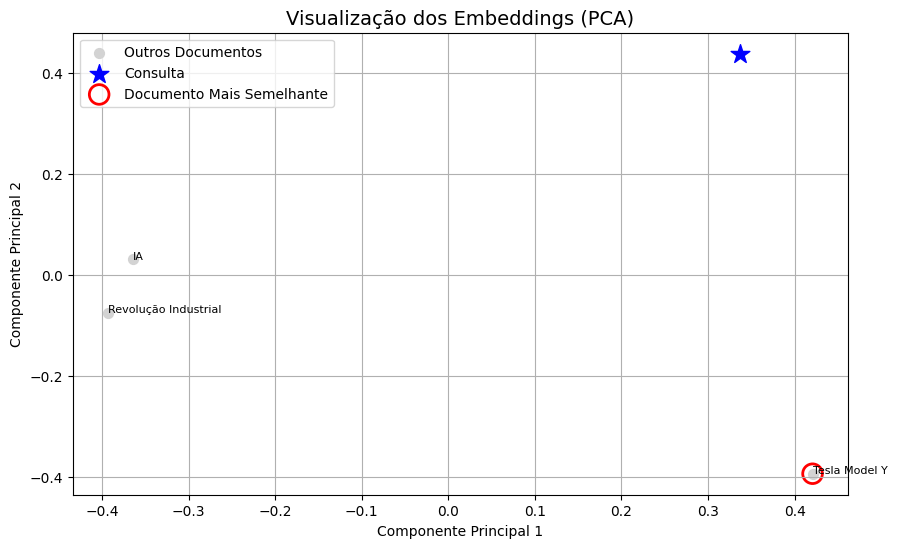

In [6]:
# Aplica PCA para redução de dimensionalidade
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(np.stack(df["Embeddings"].apply(np.array).tolist() + [embedding_consulta]))

# Plota os embeddings com nomes dos documentos
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_2d[:-1, 0], embeddings_2d[:-1, 1], label='Outros Documentos', marker='o', s=50, c='lightgray')
plt.scatter(embeddings_2d[-1, 0], embeddings_2d[-1, 1], label='Consulta', marker='*', s=200, c='blue')
plt.scatter(embeddings_2d[indice_resultado, 0], embeddings_2d[indice_resultado, 1], label='Documento Mais Semelhante', marker='o', facecolors='none', edgecolors='red', s=200, linewidth=2)

for i, txt in enumerate(df["Titulo"]):
    plt.annotate(txt, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualização dos Embeddings (PCA)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## **✅ Seção 7: Apresentação do Resultado: Documento Mais Semelhante**
Esta seção final apresenta ao usuário o resultado da busca: o conteúdo do documento que foi identificado como mais semelhante à consulta fornecida.

**Passo a passo:**
1.   **Exibição do título:** Uma mensagem simples e clara indica que o conteúdo a seguir é o resultado da busca.
2.   **Impressão do conteúdo:** O conteúdo completo do documento mais similar é exibido ao usuário.
3.   **Quebra de linha:** É usado o `textwrap.fill` para facilitar a leitura do resultado final.

Com isso, a aplicação conclui seu objetivo de encontrar e apresentar a informação mais relevante para o usuário, com base na análise de similaridade utilizando embeddings.

In [7]:
# Imprime o resultado com quebra de linha
print("\nConteúdo mais semelhante:")
print(textwrap.fill(resultado))


Conteúdo mais semelhante:
O Tesla Model Y, da montadora de Elon Musk, parece não cansar de bater
recordes. Depois de se tornar o primeiro carro elétrico da história a
ser o mais vendido no ano (em 2023), o modelo acaba de ser eleito o
melhor carro elétrico de 2024 pela revista estadunidense Consumer
Reports.
